In [11]:
!git clone https://github.com/brofcb/YoutubeTranscriptGetter.git

fatal: destination path 'YoutubeTranscriptGetter' already exists and is not an empty directory.


In [2]:
!pip install pytube3

In [3]:
!pip install youtube-transcript-api

In [4]:
!cd YoutubeTranscriptGetter;python3 ./YoutubeDataApi.py

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3186688/45929032 bytes (6.9%)7413760/45929032 bytes (16.1%)11616256/45929032 bytes (25.3%)15949824/45929032 bytes (34.7%)19865600/45929032 bytes (43.3%)24035328/45929032 bytes (52.3%)28155904/45929032 bytes (61.3%)32391168/45929032 bytes (70.5%)36691968/45929032 bytes (79.9%)40689664/45929032 bytes (88.6%)45039616/45929032 bytes (98.1%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [5]:
!pip install https://github.com/pyannote/pyannote-audio/tarball/develop

     / 16.2MB 3.0MB/s
     |████████████████████████████████| 1.6MB 8.5MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 133kB 42.3MB/s 
     |████████████████████████████████| 204kB 42.5MB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 122kB 57.5MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 112kB 58.1MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=396ec952ab7e2fbf887b57ddb621ab167a4beac27daf2add1af5be2fced7cafb
  Stored in directory: /root/.cache/p

In [7]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio
import json
project="./YoutubeTranscriptGetter"
video="joe_rogan_dwayne_the_rock_johnson_for_president_"
DEMO_FILE = {'audio': project+"/audio/"+video+".wav"}
with open(project+"/Json_scripts/"+video+".json") as f:
  script = json.load(f)

In [8]:
script

[{'duration': 4.859,
  'start': 0.75,
  'text': 'the joggin experienced in the past when'},
 {'duration': 4.74,
  'start': 3.449,
  'text': "there's been disputes or things have"},
 {'duration': 7.351,
  'start': 5.609,
  'text': "been wrong it seems like there's a clear"},
 {'duration': 6.45,
  'start': 8.189,
  'text': 'path to to sort of work things out it'},
 {'duration': 3.899, 'start': 12.96, 'text': "doesn't seem like a clear path"},
 {'duration': 3.751,
  'start': 14.639,
  'text': 'it seems like every day kind of gets a'},
 {'duration': 3.481,
  'start': 16.859,
  'text': 'little worse like people get ramped up'},
 {'duration': 4.799,
  'start': 18.39,
  'text': "even more and then there's this event"},
 {'duration': 6.179,
  'start': 20.34,
  'text': "that's looming on the horizon this"},
 {'duration': 5.43,
  'start': 23.189,
  'text': 'November event this election event I no'},
 {'duration': 4.651,
  'start': 26.519,
  'text': "matter what whether it's left or right"},
 {'d

In [10]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(DEMO_FILE)

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /root/.cache/torch/hub/master.zip


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


/usr/local/lib/python3.6/dist-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning:

The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release

/usr/local/lib/python3.6/dist-packages/pyannote/audio/features/pretrained.py:156: UserWarning:

Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


That's it? Yes, that's it :-)

In [9]:
for label in diarization.labels():
    timeLine=diarization.label_timeline(label)
    for seg in timeLine.support_iter():
        seg.start()
        seg.end()

NameError: ignored

# Evaluation with `pyannote.metrics`

Because groundtruth is available, we can evaluate the quality of the diarization pipeline by computing the [diarization error rate](http://pyannote.github.io/pyannote-metrics/reference.html#diarization).

In [ ]:
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
der = metric(groundtruth, diarization)

In [ ]:
print(f'diarization error rate = {100 * der:.1f}%')

diarization error rate = 42.9%


This implementation of diarization error rate is brought to you by [`pyannote.metrics`](http://pyannote.github.io/pyannote-metrics/).

It can also be used to improve visualization by find the optimal one-to-one mapping between groundtruth and hypothesized speakers.

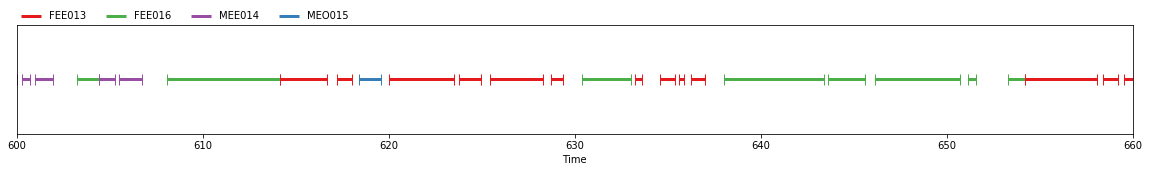

In [ ]:
mapping = metric.optimal_mapping(groundtruth, diarization)
diarization.rename_labels(mapping=mapping)

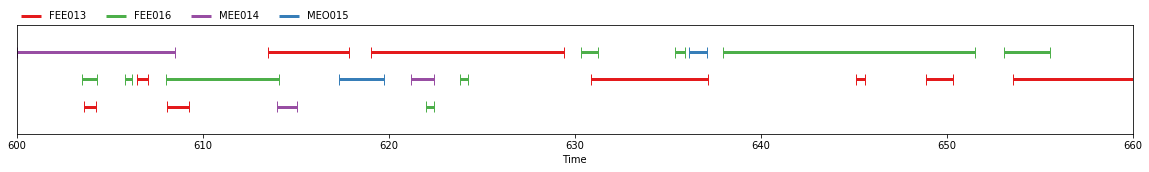

In [ ]:
groundtruth

# Going further 

We have only scratched the surface in this introduction. 

More details about `pyannote.audio` can be found in the [paper](https://arxiv.org/abs/1911.01255), while tutorials (for training or fine-tuning models on your own data) are available on the [`pyannote.audio` Github repository](https://github.com/pyannote/pyannote-audio).


## Teaser: overlap detection

It can even do overlapped speech detection (which would definitely come very handy for this messy meeting conversation)

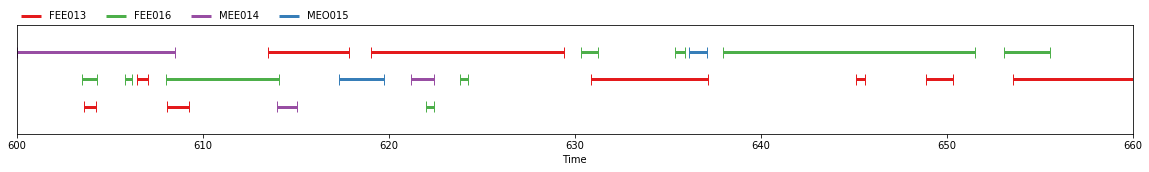

In [ ]:
groundtruth

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


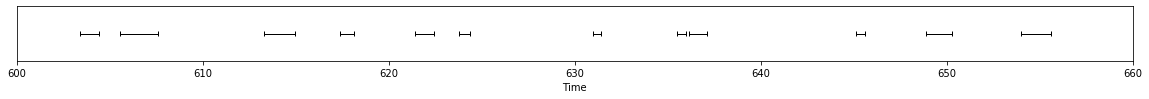

In [ ]:
overlap_detection = torch.hub.load('pyannote/pyannote-audio', 'ovl_ami', pipeline=True)
overlap_detection(DEMO_FILE).get_timeline()